# CS 437/5317 - Deep Learning - Programming Assignment 3 - Part 1

### These are all the imports you'll need for this part. If you want to add more, run it through me.

In [36]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import os
from torchsummary import summary
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm.notebook import tqdm
import numpy as np
import torchvision
from torch import nn, optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
])
from helper import (
    noisy_images,
    training_loop_supervised,
    training_loop_unsupervised,
    visualize_reconstructions,
    evaluate
)

BATCH_SIZE = 128 # feel free to change this & use this variable whenenver you're asked for a batch size


cuda


## Task 1: Supervised Learning with CNNs

### Part 1: CIFAR-10 Classification

Load the CIFAR-10 dataset from `torchvision.datasets`, train on the training set, and evaluate on the test set. You should aim to achieve a good accuracy on this task (above 70% on the test set), so feel free to experiment!

In [23]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])
train_data = torchvision.datasets.CIFAR10(root='./cifar10-data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_data = torchvision.datasets.CIFAR10(root='./cifar10-data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


### Visualizing the Dataset

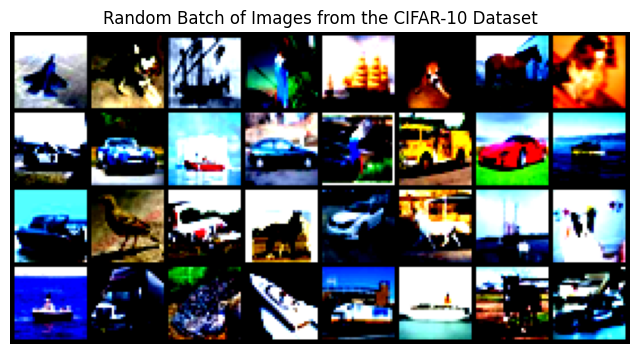

In [24]:
# Visualizing the data:
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title("Random Batch of Images from the CIFAR-10 Dataset")
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, _ = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[0:32]))


#### Define your CNN Class below.
Add multiple convolutional layers, as well as Batch Normalization and dropout layers along with the ReLU activation function in the convolutional block/encoder. Follow it up with a classifier layer that takes in the logits and spits out the class probabiltiies.

In [25]:
class CNN(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(CNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(dropout_rate),
            nn.Flatten(),
            nn.Linear(32*4*4, 80),
            nn.ReLU(),

        )
        self.classifier = nn.Sequential(
            nn.Linear(80, 10),
            # nn.Dropout(dropout_rate),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        # Code here
        x = self.encoder(x)

        x = self.classifier(x)
        return x


### Implement a training loop function for Supervised Learning in `helper.py`.

This function should return the training loss & test accuracy history, as well as save the model with the best test accuracy.

In [21]:
model = CNN()


model.to(device)
summary(model, input_size=(3, 32, 32), batch_size=BATCH_SIZE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [128, 8, 32, 32]             216
       BatchNorm2d-2           [128, 8, 32, 32]              16
              ReLU-3           [128, 8, 32, 32]               0
         MaxPool2d-4           [128, 8, 16, 16]               0
           Dropout-5           [128, 8, 16, 16]               0
            Conv2d-6          [128, 16, 16, 16]           1,152
       BatchNorm2d-7          [128, 16, 16, 16]              32
              ReLU-8          [128, 16, 16, 16]               0
         MaxPool2d-9            [128, 16, 8, 8]               0
          Dropout-10            [128, 16, 8, 8]               0
           Conv2d-11            [128, 32, 8, 8]           4,608
      BatchNorm2d-12            [128, 32, 8, 8]              64
             ReLU-13            [128, 32, 8, 8]               0
        MaxPool2d-14            [128, 3

In [33]:


model = CNN()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20


model.to(device)
#./PA3-1_Part1_Task1_24100043.pth
model_path = "./Cifar10_CNN_classifier_PA3_rollnumber.pth"
# chekpoint = torch.load(model_path)
# model.load_state_dict(chekpoint['model_state_dict'])
# optimizer.load_state_dict(chekpoint['optimizer_state_dict'])



train_hist, test_hist = training_loop_supervised(model, train_loader, test_loader, num_epochs,
                                                 criterion, optimizer, device, model_path)


#did training on multiple different times so used load check point so graphs only show history of last run


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1/20, Train Loss: 0.002969, Train Accuracy: 0.685180
Test Loss: 0.003317, Test Accuracy: 0.674700
Epoch: 2/20, Train Loss: 0.002844, Train Accuracy: 0.681480
Test Loss: 0.003151, Test Accuracy: 0.673500
Epoch: 3/20, Train Loss: 0.002800, Train Accuracy: 0.684940
Test Loss: 0.003241, Test Accuracy: 0.695100
Epoch: 4/20, Train Loss: 0.002854, Train Accuracy: 0.681600
Test Loss: 0.003126, Test Accuracy: 0.680400
Epoch: 5/20, Train Loss: 0.002939, Train Accuracy: 0.687860
Test Loss: 0.003217, Test Accuracy: 0.690200
Epoch: 6/20, Train Loss: 0.002964, Train Accuracy: 0.686280
Test Loss: 0.003121, Test Accuracy: 0.680400
Epoch: 7/20, Train Loss: 0.002916, Train Accuracy: 0.689860
Test Loss: 0.003182, Test Accuracy: 0.691700
Epoch: 8/20, Train Loss: 0.002838, Train Accuracy: 0.696800
Test Loss: 0.003197, Test Accuracy: 0.692400
Epoch: 9/20, Train Loss: 0.002828, Train Accuracy: 0.700720
Test Loss: 0.003187, Test Accuracy: 0.693700
Epoch: 10/20, Train Loss: 0.002901, Train Accuracy: 0.7

In [38]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.6f}, Test Accuracy: {test_acc:.6f}")

Test Loss: 0.003099, Test Accuracy: 0.700700


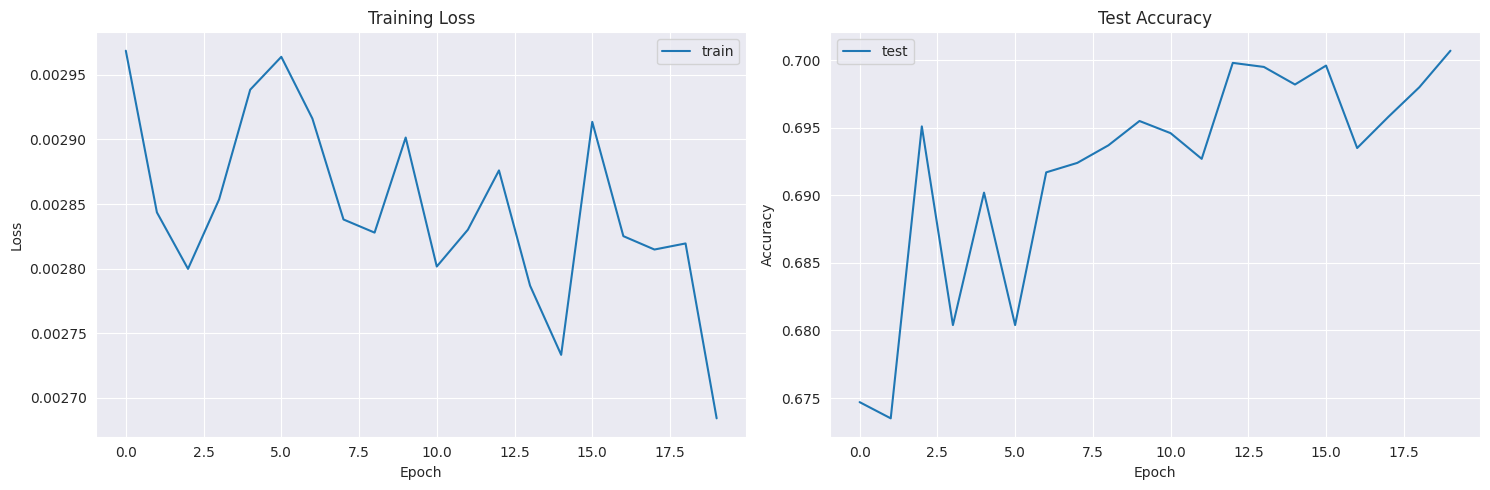

In [35]:




plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.set_style(style="darkgrid")
train_hist = np.array([tensor.item() for tensor in train_hist])
sns.lineplot(data=train_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")


plt.subplot(1, 2, 2)
sns.set_style(style="darkgrid")
test_hist = np.array([tensor.item() for tensor in test_hist])
sns.lineplot(data=test_hist, label="test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.tight_layout()
plt.show()




## Task 2: Image Reconstruction and Denoising



Load the MNIST dataset into memory from `torchvision.datasets`. Our first task is to create a hierarchical Linear model that sequentially reduces the spatial dimensions of the images, encodes/compresses them from `28x28` images to just `10` features in a compact latent space representation, and then reconstruct the images using those 10 features. This type of an Encoder-Decoder architecture can be efficiently used for image compression (although there's a computational overhead)

In [58]:

transform = transforms.Compose([
    transforms.ToTensor(),
])
train_data = torchvision.datasets.MNIST(root='./mnist-data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_data = torchvision.datasets.MNIST(root='./mnist-data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)



In [12]:

# Create your Linear AutoEncoder Class:

class LinearAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 15)
        )
        self.decoder = nn.Sequential(

            nn.Linear(15, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()

        )
    def forward(self, x):


        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)

        return x




#### Define a function that adds Gaussian noise to images (remember to clamp the values b/w 0 and 1) in `helper.py`

### Write the training loop for unsupervised training in `helper.py`

**Note**: It'll be very similar to the supervised training loop, so feel free to copy that and make the necessary changes

For denoising, add noise to your image before passing it to the model. You must use the default parameters of the `noisy_images` function

In [13]:

model = LinearAutoEncoder()

model.to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 32]           2,080
              ReLU-7                   [-1, 32]               0
            Linear-8                   [-1, 15]             495
            Linear-9                   [-1, 32]             512
             ReLU-10                   [-1, 32]               0
           Linear-11                   [-1, 64]           2,112
             ReLU-12                   [-1, 64]               0
           Linear-13                  [-1, 128]           8,320
             ReLU-14                  [

### Train your model. Use MSELoss & AdamW optimizer

In [14]:
# Code here
model = LinearAutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
model.to(device)
#./PA3-1_Part1_Task2_Linear_AE_recons_24100043.pth
model_path = "./MNIST10_LinearAutoEncoder_PA3_rollnumber.pth" # change this according to where you wanna save the model weights
num_epochs = 20
train_hist, test_hist = training_loop_unsupervised(model, "reconstruction",train_loader, test_loader, num_epochs,
                                                 criterion, optimizer, device, model_path)



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1/20, Train Loss: 0.000081
Test Loss: 0.000090
Epoch: 2/20, Train Loss: 0.000058
Test Loss: 0.000069
Epoch: 3/20, Train Loss: 0.000052
Test Loss: 0.000052
Epoch: 4/20, Train Loss: 0.000049
Test Loss: 0.000047
Epoch: 5/20, Train Loss: 0.000040
Test Loss: 0.000044
Epoch: 6/20, Train Loss: 0.000040
Test Loss: 0.000041
Epoch: 7/20, Train Loss: 0.000043
Test Loss: 0.000039
Epoch: 8/20, Train Loss: 0.000039
Test Loss: 0.000035
Epoch: 9/20, Train Loss: 0.000037
Test Loss: 0.000034
Epoch: 10/20, Train Loss: 0.000032
Test Loss: 0.000033
Epoch: 11/20, Train Loss: 0.000033
Test Loss: 0.000032
Epoch: 12/20, Train Loss: 0.000033
Test Loss: 0.000031
Epoch: 13/20, Train Loss: 0.000033
Test Loss: 0.000029
Epoch: 14/20, Train Loss: 0.000031
Test Loss: 0.000028
Epoch: 15/20, Train Loss: 0.000031
Test Loss: 0.000027
Epoch: 16/20, Train Loss: 0.000029
Test Loss: 0.000027
Epoch: 17/20, Train Loss: 0.000030
Test Loss: 0.000025
Epoch: 18/20, Train Loss: 0.000029
Test Loss: 0.000026
Epoch: 19/20, Train

### Plot the test loss history

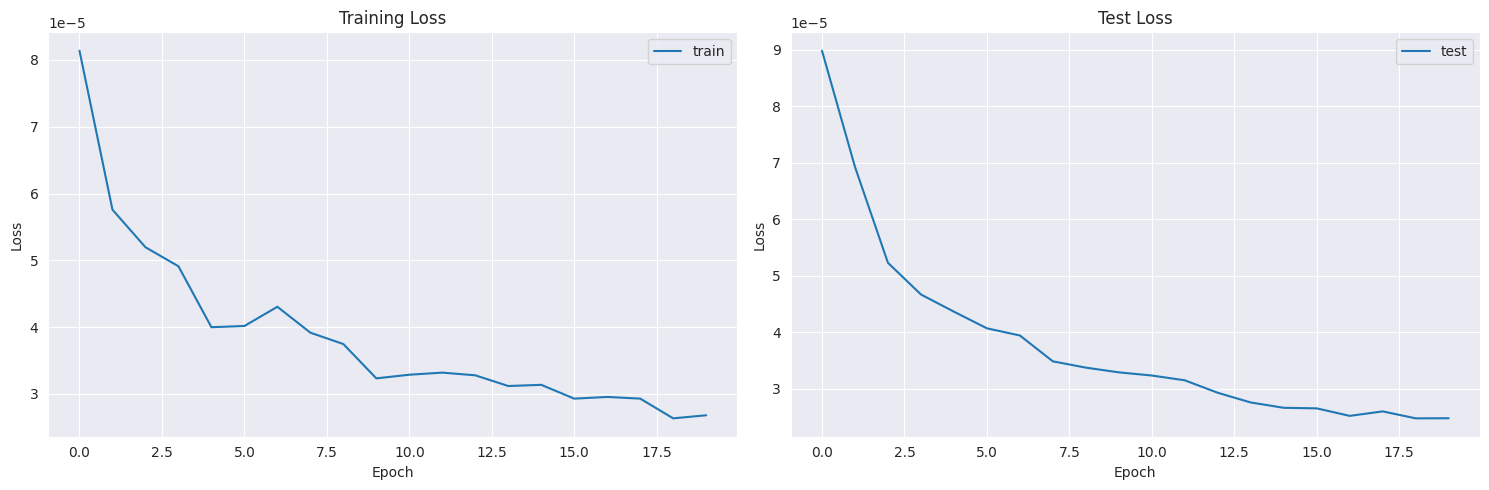

In [15]:




plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.set_style(style="darkgrid")
train_hist = np.array([tensor.item() for tensor in train_hist])
sns.lineplot(data=train_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")


plt.subplot(1, 2, 2)
sns.set_style(style="darkgrid")
test_hist = np.array([tensor.item() for tensor in test_hist])
sns.lineplot(data=test_hist, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.tight_layout()
plt.show()




### Visualizing the model's reconstructions:

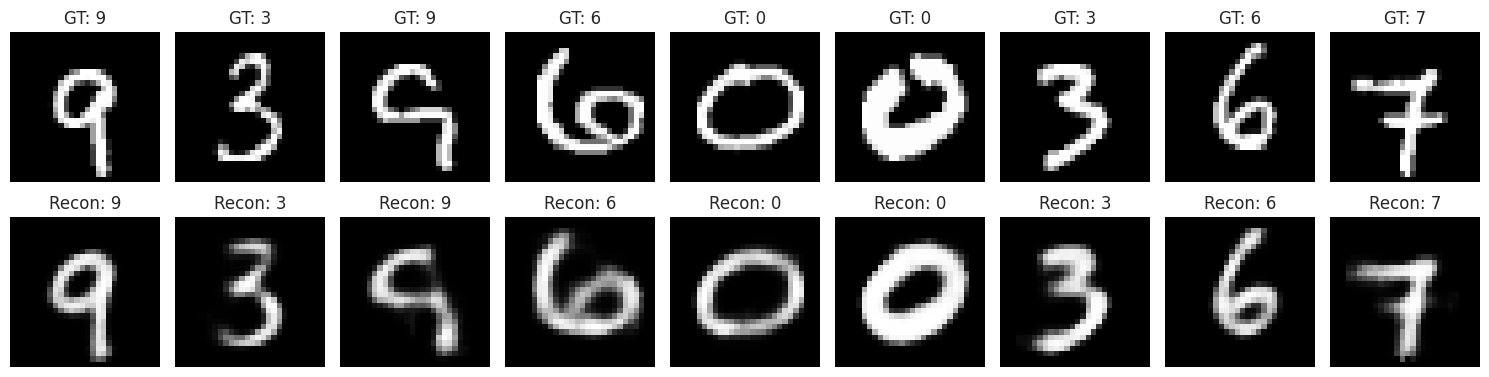

In [16]:


visualize_reconstructions(test_loader, model, device, 'reconstruction')

### Now do denoising using a new instance of the LinearAutoEncoder class

In [8]:
# Code here

model = LinearAutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

model.to(device)
#./PA3-1_Part1_Task2_Linear_AE_denoise_24100043.pth
model_path = "./LinearAutoEncoder_denoise_PA3_rollnumber.pth" # change this according to where you wanna save the model weights
num_epochs = 25
train_hist, test_hist = training_loop_unsupervised(model, "denoising",train_loader, test_loader, num_epochs,
                                                 criterion, optimizer, device, model_path)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1/25, Train Loss: 0.000170
Test Loss: 0.000177
Epoch: 2/25, Train Loss: 0.000159
Test Loss: 0.000166
Epoch: 3/25, Train Loss: 0.000152
Test Loss: 0.000158
Epoch: 4/25, Train Loss: 0.000150
Test Loss: 0.000155
Epoch: 5/25, Train Loss: 0.000149
Test Loss: 0.000153
Epoch: 6/25, Train Loss: 0.000147
Test Loss: 0.000154
Epoch: 7/25, Train Loss: 0.000147
Test Loss: 0.000153
Epoch: 8/25, Train Loss: 0.000147
Test Loss: 0.000154
Epoch: 9/25, Train Loss: 0.000145
Test Loss: 0.000151
Epoch: 10/25, Train Loss: 0.000145
Test Loss: 0.000149
Epoch: 11/25, Train Loss: 0.000144
Test Loss: 0.000151
Epoch: 12/25, Train Loss: 0.000144
Test Loss: 0.000150
Epoch: 13/25, Train Loss: 0.000143
Test Loss: 0.000144
Epoch: 14/25, Train Loss: 0.000143
Test Loss: 0.000144
Epoch: 15/25, Train Loss: 0.000144
Test Loss: 0.000148
Epoch: 16/25, Train Loss: 0.000142
Test Loss: 0.000146
Epoch: 17/25, Train Loss: 0.000142
Test Loss: 0.000150
Epoch: 18/25, Train Loss: 0.000142
Test Loss: 0.000149
Epoch: 19/25, Train

#### Plot the test loss history

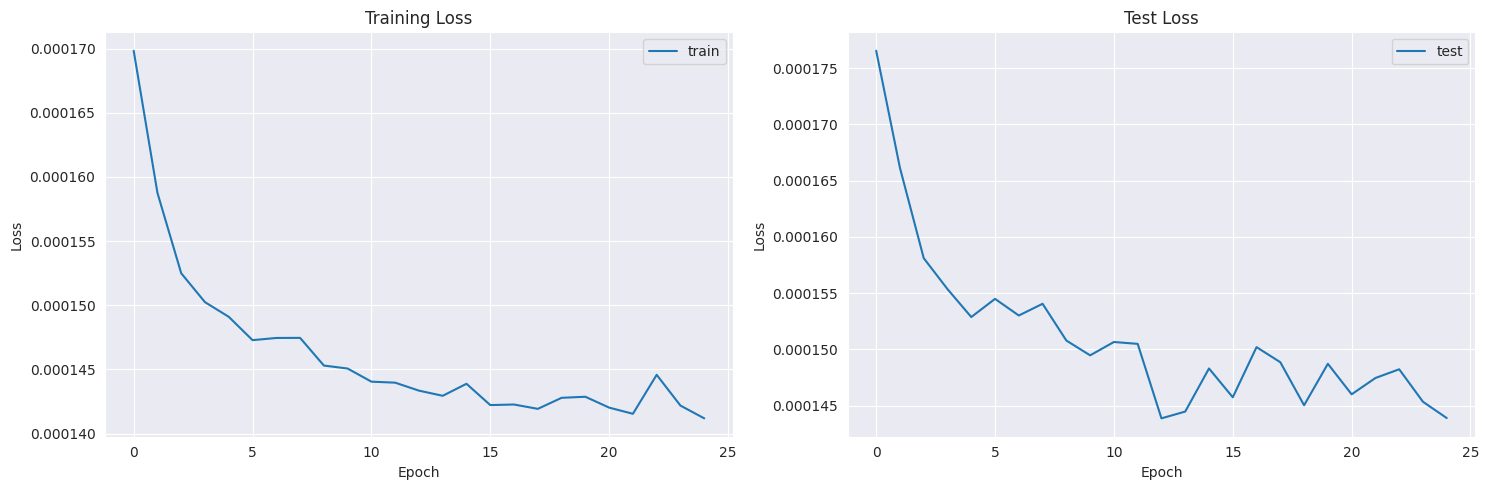

In [10]:




plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.set_style(style="darkgrid")
train_hist = np.array([tensor.item() for tensor in train_hist])
sns.lineplot(data=train_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")


plt.subplot(1, 2, 2)
sns.set_style(style="darkgrid")
test_hist = np.array([tensor.item() for tensor in test_hist])
sns.lineplot(data=test_hist, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.tight_layout()
plt.show()




### Visualizing the Denoising

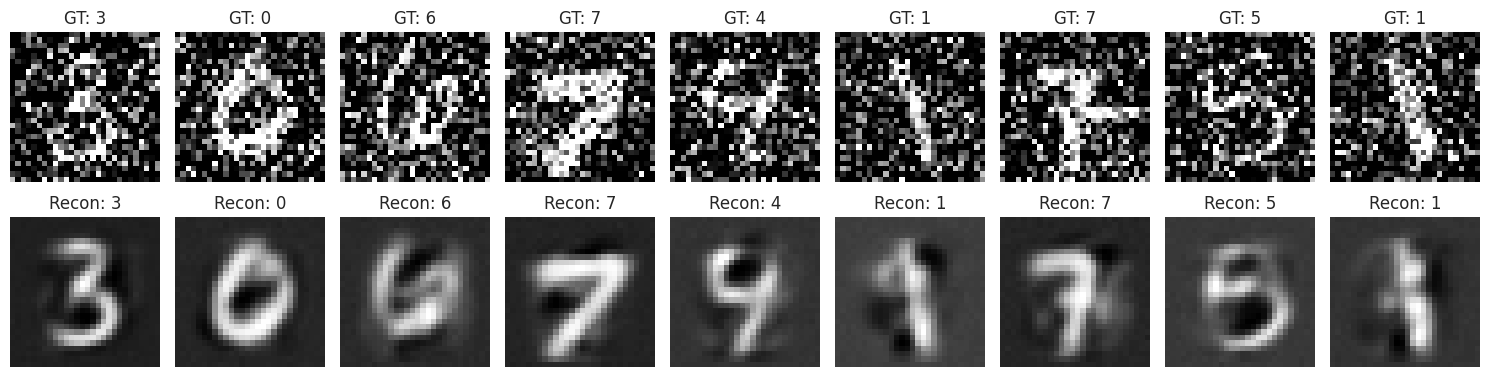

In [11]:
visualize_reconstructions(test_loader, model, device, 'denoising')

#### A massive drawback of a simple linear architecture is that we lose a ton of spatial information of the image when we flatten it. Moreover, treating each pixel as one input has a massive computational overhead, especially when you're dealing with higher resolution images (e.g., in ImageNET, the 3x224x224 images would lead to 150,528 inputs!). You might even see some poor denoising by this model. Generally, for image data, convolutional architectures are far more popular, and you'll see why in this next part.

Using the Convolutional Encoder-Decoder Model described in the instructions, do both image reconstruction and denoising

In [59]:
class AutoEncoder_CNN(nn.Module):
    # Code here
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), #14x14
            nn.MaxPool2d(kernel_size=2, stride=2), #7x7
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=2, padding=2),
            nn.ReLU(), #4x4
            nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True),
            #2x2
        )
    
        '''
        Hout =(H_in-1)xstride[0]-2xpadding[0]+dilation[0]x(kernel_size[0]-1)+output_padding[0]+1
        '''
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=5, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=7, stride=2, output_padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x , indices = self.encoder(x)
        x = self.unpool(x, indices)

        x = self.decoder(x)

        return x

In [63]:
model = AutoEncoder_CNN()
summary(model.to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             800
              ReLU-2           [-1, 16, 14, 14]               0
         MaxPool2d-3             [-1, 16, 7, 7]               0
            Conv2d-4             [-1, 32, 4, 4]          12,832
              ReLU-5             [-1, 32, 4, 4]               0
         MaxPool2d-6  [[-1, 32, 2, 2], [-1, 32, 2, 2]]               0
       MaxUnpool2d-7             [-1, 32, 4, 4]               0
   ConvTranspose2d-8           [-1, 16, 11, 11]          12,816
              ReLU-9           [-1, 16, 11, 11]               0
  ConvTranspose2d-10            [-1, 1, 28, 28]             785
          Sigmoid-11            [-1, 1, 28, 28]               0
Total params: 27,233
Trainable params: 27,233
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
For

Train your model:

In [64]:
# Code here
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
model.to(device)
#./PA3-1_Part1_Task2_CNN_AE_recons_24100043.pth
model_path = "./MNIST_AutoEncoder_reconstruction_CNN_PA3_rollnumber.pth" # change this according to where you wanna save the model weights
num_epochs = 20
train_hist, test_hist = training_loop_unsupervised(model, "reconstruction",train_loader, test_loader, num_epochs,
                                                 criterion, optimizer, device, model_path)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1/20, Train Loss: 0.000063
Test Loss: 0.000055
Epoch: 2/20, Train Loss: 0.000043
Test Loss: 0.000039
Epoch: 3/20, Train Loss: 0.000032
Test Loss: 0.000031
Epoch: 4/20, Train Loss: 0.000029
Test Loss: 0.000024
Epoch: 5/20, Train Loss: 0.000024
Test Loss: 0.000020
Epoch: 6/20, Train Loss: 0.000021
Test Loss: 0.000018
Epoch: 7/20, Train Loss: 0.000018
Test Loss: 0.000015
Epoch: 8/20, Train Loss: 0.000016
Test Loss: 0.000013
Epoch: 9/20, Train Loss: 0.000015
Test Loss: 0.000012
Epoch: 10/20, Train Loss: 0.000014
Test Loss: 0.000011
Epoch: 11/20, Train Loss: 0.000014
Test Loss: 0.000010
Epoch: 12/20, Train Loss: 0.000013
Test Loss: 0.000009
Epoch: 13/20, Train Loss: 0.000012
Test Loss: 0.000009
Epoch: 14/20, Train Loss: 0.000011
Test Loss: 0.000009
Epoch: 15/20, Train Loss: 0.000011
Test Loss: 0.000008
Epoch: 16/20, Train Loss: 0.000011
Test Loss: 0.000008
Epoch: 17/20, Train Loss: 0.000010
Test Loss: 0.000008
Epoch: 18/20, Train Loss: 0.000010
Test Loss: 0.000008
Epoch: 19/20, Train

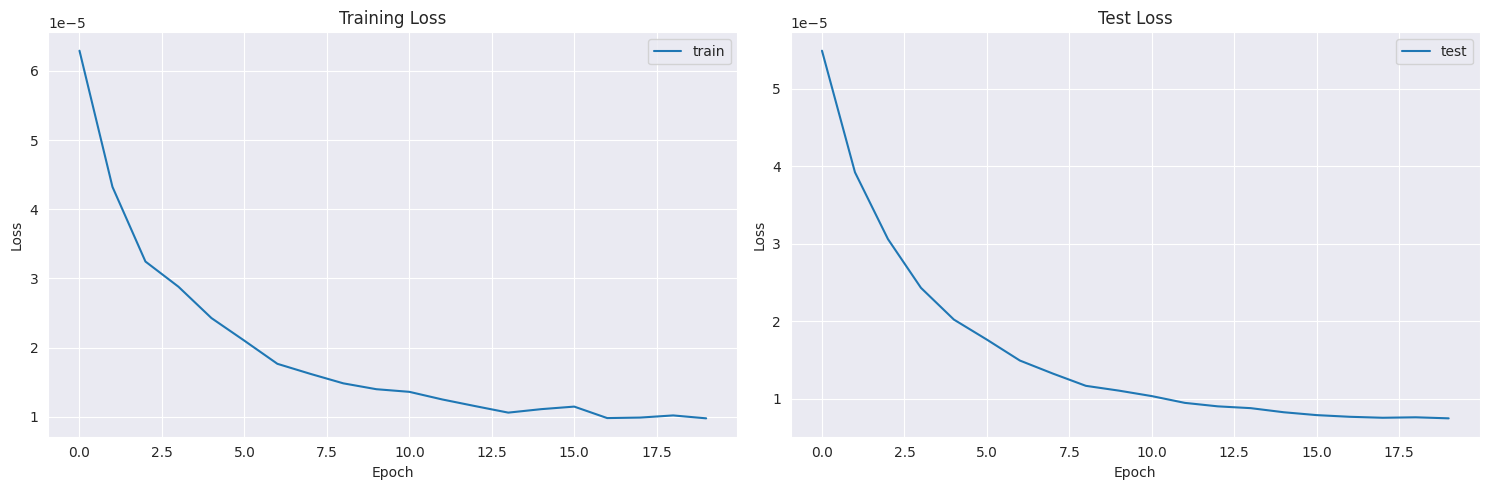

In [65]:




plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.set_style(style="darkgrid")
train_hist = np.array([tensor.item() for tensor in train_hist])
sns.lineplot(data=train_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")


plt.subplot(1, 2, 2)
sns.set_style(style="darkgrid")
test_hist = np.array([tensor.item() for tensor in test_hist])
sns.lineplot(data=test_hist, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.tight_layout()
plt.show()




## Visualization

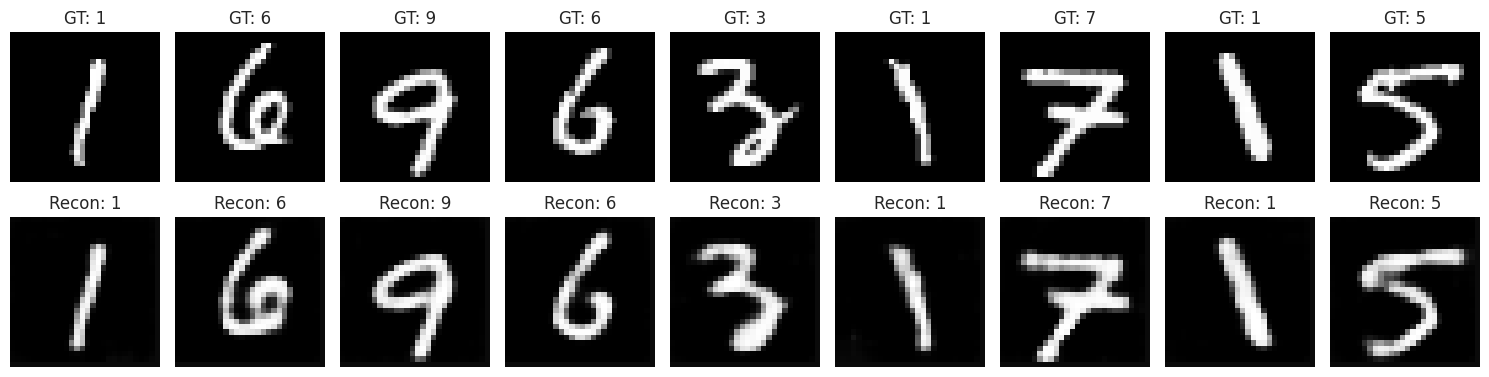

In [66]:
visualize_reconstructions(test_loader, model, device, 'reconstruction')

### Now do the same for Denoising:

In [60]:
# Code here
model = AutoEncoder_CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)
model.to(device)
#./PA3-1_Part1_Task2_CNN_AE_denoise_24100043.pth
model_path = "./MNIST_AutoEncoder_CNN_denoise_PA3_rollnumber.pth" # change this according to where you wanna save the model weights
num_epochs = 15
# checkpoint = torch.load(model_path)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

train_hist, test_hist = training_loop_unsupervised(model, "denoising",train_loader, test_loader, num_epochs,
                                                 criterion, optimizer, device, model_path)



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1/15, Train Loss: 0.000206
Test Loss: 0.000221
Epoch: 2/15, Train Loss: 0.000181
Test Loss: 0.000197
Epoch: 3/15, Train Loss: 0.000173
Test Loss: 0.000178
Epoch: 4/15, Train Loss: 0.000165
Test Loss: 0.000171
Epoch: 5/15, Train Loss: 0.000159
Test Loss: 0.000164
Epoch: 6/15, Train Loss: 0.000158
Test Loss: 0.000161
Epoch: 7/15, Train Loss: 0.000154
Test Loss: 0.000154
Epoch: 8/15, Train Loss: 0.000150
Test Loss: 0.000153
Epoch: 9/15, Train Loss: 0.000148
Test Loss: 0.000150
Epoch: 10/15, Train Loss: 0.000147
Test Loss: 0.000156
Epoch: 11/15, Train Loss: 0.000146
Test Loss: 0.000153
Epoch: 12/15, Train Loss: 0.000145
Test Loss: 0.000147
Epoch: 13/15, Train Loss: 0.000142
Test Loss: 0.000148
Epoch: 14/15, Train Loss: 0.000144
Test Loss: 0.000147
Epoch: 15/15, Train Loss: 0.000140
Test Loss: 0.000146


### Plot the test_loss history

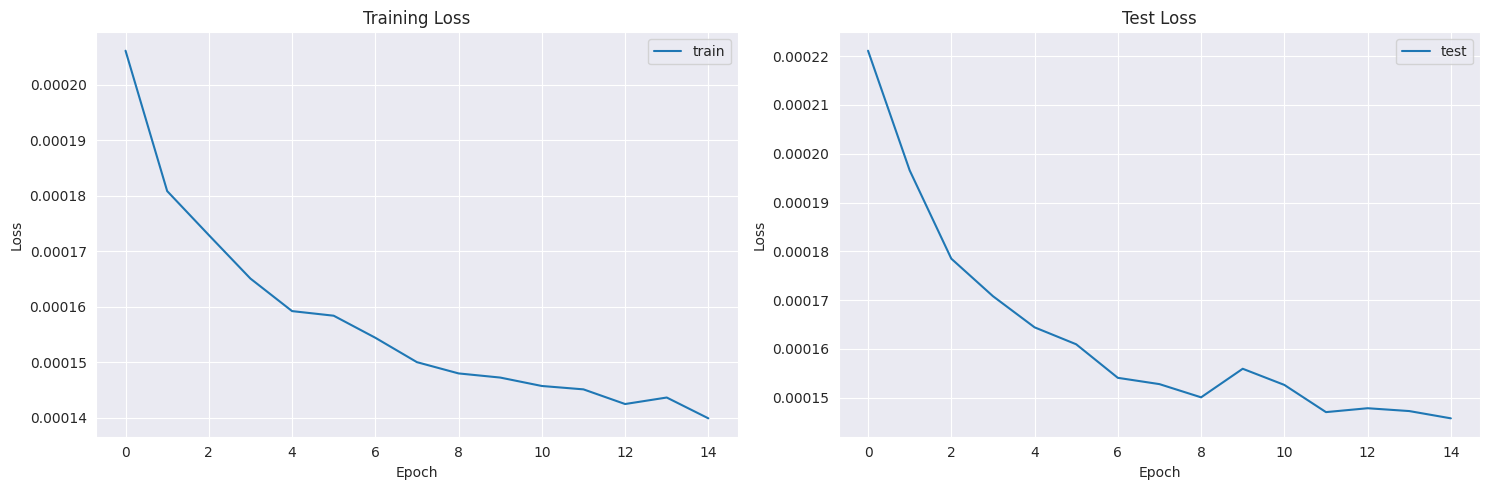

In [61]:




plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.set_style(style="darkgrid")
train_hist = np.array([tensor.item() for tensor in train_hist])
sns.lineplot(data=train_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")


plt.subplot(1, 2, 2)
sns.set_style(style="darkgrid")
test_hist = np.array([tensor.item() for tensor in test_hist])
sns.lineplot(data=test_hist, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.tight_layout()
plt.show()




### Visualizing the Denoising of the Convolutional AE model

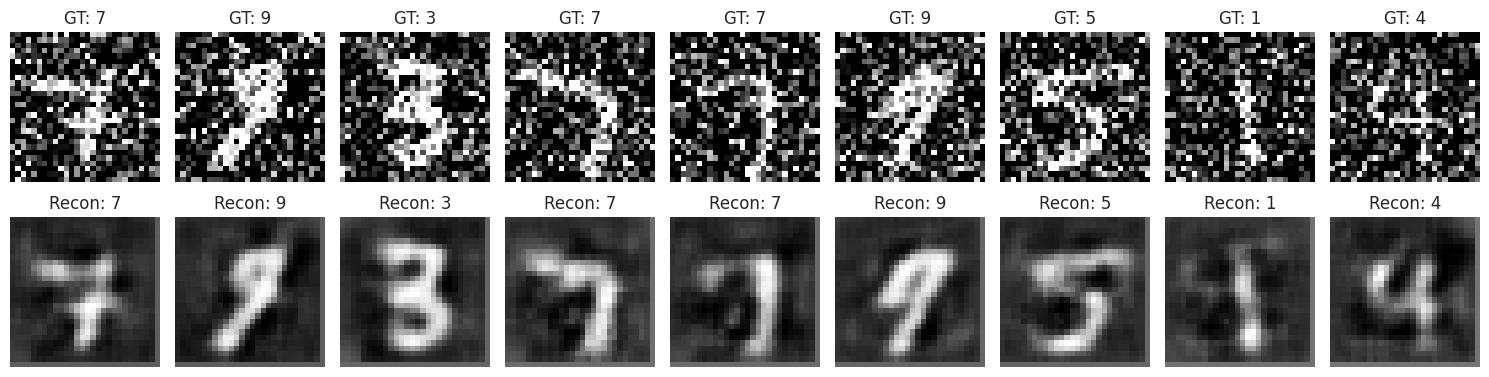

In [62]:
visualize_reconstructions(test_loader, model, device, 'denoising')

Clearly far better, right? And with much less parameters!

#### Compare the number of parameters of both models, and comment on how/why a convolutional neural network performs so much better on image data compared to a fully connected network while using far less parameters.

- Answer here:
In fc network each pixel in image is treated as a feature so for high res picture there will be alot of parameters which increases model complexity and make it overfit and perform poorly and also it increase the training time. 
In my FC network I had 223,391 trainable params and the lowest val loss i got on recon was 0.000025 and on denoising was 0.000144
whereas in my CNN AE I had 27,233 params and the lowest val loss i got on recon was 0.000007 and on denoising was 0.000146

- Clearly the CNN AE performed better than the FC AE and also had significantly less parameters. The CNN AE performance on denoising was more or less the same may that can be improved by better regularization of the model.

- Overall CNN AE performs better as it is able to capture the spatial information of the image and the number of params are less so there is less chance of image. The params are shared in CNN so its able to capture all local patterns in the Image but the FC network deals the pixels individually so its not able to find such local patterns in image.